# VII. Machine Learning Part II: A Neural Network

## A Non-Linear Problem

Last time we dealt with regression, a series of statistical tools to fit a trend to a dataset. The tools worked  well whenever we chose the appropriate model, but we *always* needed to make that choice. Is the data linear? Is it represented by a cubic polynomial, perhaps a sine function? What happens if we don't have any good guesses? **Neural networks** were created to address this issue.

To introduce the concept of a neural network, we will tackle a low-dimensional but nonlinear problem: the [XOR Problem](https://medium.com/@jayeshbahire/the-xor-problem-in-neural-networks-50006411840b). This is a classical example in the field of machine learning, because it exemplifies why non-linear models are necessary.

The [XOR operator](https://en.wikipedia.org/wiki/Exclusive_or) (also known as *exclusive or*) is a binary operation defined by the table:

| Input A | Input B | Output |
|:-------:|:-------:|:------:|
|    0    |    0    |    0   |
|    0    |    1    |    1   |
|    1    |    0    |    1   |
|    1    |    1    |    0   |

This is a very *easy* operation, but it is extremely *nonlinear*!
<img src="https://cdn-images-1.medium.com/max/800/0*qdRb80zUpJPtrbRD." width="500" />

Can we fit a model to this table? In other words, can we *learn* a good model? A good tool for nonlinear modelling should be able to tackle the XOR problem.

### Inputs and Outputs

To begin, we will import some of the usual tools:

In [1]:
import math
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

We will define an array of *inputs*,

In [2]:
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
print(inputs)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


as well as an array of *target outputs*:

In [3]:
targetOutputs = np.array([[0], [1], [1], [0]])
print(targetOutputs)

[[0]
 [1]
 [1]
 [0]]


These inputs and target outputs correspond to the $X_i$ and $Y_i$ values of last time. The $X_i$ are now vector-valued, but **the idea is the same**: designing a *loss function*
\begin{align}
\mathcal{J} = \frac{1}{S}\sum_{i=1}^{S}(Y_i-y_i)^2,
\end{align}
where $y_i$ are the approximations of $Y_i$ given by our model, and $S$ is the number if input-output pairs $(X_i, Y_i)$, and minimise this function with respect to the parameters of the model. *For simplicity, we will assume the output is one-dimensional*.

### A Neural Network

So what *is* a neural network? A neural network is just one type of model, like the linear or the quadratic models we saw last time. The only difference is that neural networks are nonlinear, and can be made arbitrality complex; essentially is a *more general* method.

Here is a picture of a *small* network:

<img src="http://www.astroml.org/_images/fig_neural_network_1.png" width="600" />

Given an input $X_i$, its entries are assigned to the *input layer*; each entry sits on a *node* (these are circles in the image). The entries of the *hidden layer* are calculated using these inputs; each line linking two nodes represents a dependence. Each node in the hidden layer is allowed to depend on all the inputs, and each of these links will be fine-tuned later. Once the hidden layer has been computed, the *output layer* is calculated. Note that the output layer depends only on the previous layer, and not directly on the input.

The size of each layer has to be determined heuristically. Furthermore, we may have several hidden layers, each depending on the previous one. Using a network with a large number of hidden layers is sometimes referred to as **deep learning**.

Mathematically, we will denote size of the $a$-th layer by $m_a$. Then, the $a$-th layer will be written $L_{a}$, and the $i$-th node of the $a$-th layer, $L_{a, i}$. Note $L_{a, i}\in\mathbb{R}$ and $L_{a}\in\mathbb{R}^{m_{a}}$

How will we build this network? We will first decide on the number of layers, and the size of each layer. To begin we will use three layers, *input*, *hidden* and *output*. The input layer will have two nodes because the inputs are two-dimensional, and similarly the output layer will only have one node. We will let the hidden layer have three nodes for now.

To begin, we will create a `numpy` array `m` containing the sizes of each layer, and will define `N` as the number of layers:

In [4]:
m = np.array([2,3,1])
N = len(m)

We can now create `L`, a list of all the layers. Each layer should be a `numpy` array:

In [5]:
L = [np.zeros(m[a]) for a in range(0, N)]

print(L)

[array([0., 0.]), array([0., 0., 0.]), array([0.])]


### Links between Nodes

How do we compute the values of a node? Usually, we will define each links with a series of *weights* for the nodes of the previous layer plus a *bias* for the node. The result obtained from the calculation is put through an *activation function*. The picture looks like:

<img src="https://i.stack.imgur.com/VqOpE.jpg" width="600" />

Using our notation, the nodes satisfy the relation
$$
L_{a, j} = \sigma\left(R_{a, j}\right),
$$
where $R_{a, j}$ is the *raw value* of the node, given by
$$
R_{a, j} = \sum_{i=1}^{m_{a-1}} L_{a-1, i}W_{a-1, i, j} + B_{a, j},
$$
and where $W_{a-1, i, j}\in\mathbb{R}$ is the *weight* of the node $L_{a-1, i}$ in the calculation of the target node $L_{a, j}$, $B_{a, j}\in\mathbb{R}$ is the *bias* of $L_{a, j}$, and $\sigma$ is the activation function. In vector-matrix form:
$$
L_{a} = \sigma\left(L_{a-1}W_{a-1} + B_{a}\right),
$$
where $L_{a}, B_{a}\in\mathbb{R}^{m_{a}}$, $L_{a-1}\in\mathbb{R}^{m_{a-1}}$ are vectors and $W_{a-1}\in\mathbb{R}^{m_{a-1}\times m_{a}}$ is a matrix.

We can define two lists `W` and `B` containing the corresponding weights and biases, initially chosen at random:

In [6]:
W = [rand(m[a], m[a+1])*2-1 for a in range(0, N-1)]

print(W[0])
print()
print(W[1])

[[-0.12567156  0.08573801  0.94529945]
 [-0.02782297 -0.37666825  0.66282708]]

[[-0.36207647]
 [-0.90980984]
 [ 0.09575575]]


(Make sure the first element of `B` is `[]` so that the indexing agrees with the notation. The first layer does not need biases)

In [7]:
B = [np.array([])]+[rand(m[a+1])*2-1 for a in range(0, N-1)]

print(B[1])
print()
print(B[2])

[-0.21174668  0.09281821  0.17128449]

[0.8111353]


We can now define the input layer randomly, and print `L` to check it has been assigned correctly:

In [8]:
L[0] = rand(m[0])

print(L)

[array([0.61556256, 0.96815608]), array([0., 0., 0.]), array([0.])]


We define the *activation function*, which for now can be just the identity:

In [9]:
def activation(t): return t

Finally, we iterate through the layers and compute each one from the previous one using one of the two recurrence formulae. We will create an `R` array for convenience. Print `L` again to compare!

In [10]:
R = [np.zeros(m[a]) for a in range(0, N)]

for a in range(0, N-1):
    R[a+1] = np.matmul(L[a], W[a]) + B[a+1]
    L[a+1] = np.array([activation(x) for x in R[a+1]])

print(L)

[array([0.61556256, 0.96815608]), array([-0.31604237, -0.21907834,  1.39489551]), array([1.2584557])]


### A Network Class

This code is getting messy! We are going to evaluate this network over and over again, for all the different inputs, for many different weights and biases. We need a way of keeping the code compact. The best way is to define a `Network` class whose constructor takes `m` and defines `N`, `L`, `W` and `B` as before, this time as its own fields.

In [11]:
class Network:
    def __init__(self, m):
        self.m = m
        self.N = len(m)
        self.L = [np.zeros(m[a]) for a in range(0, self.N)]
        self.R = [np.zeros(m[a]) for a in range(0, self.N)]
        self.W = [rand(m[a], m[a+1])*2-1 for a in range(0, self.N-1)]
        self.B = [[]] + [rand(m[a+1])*2-1 for a in range(0, self.N-1)]

In [12]:
Network([2,3,1])

We can add a `compute` method with takes an `input` and evaluates the network as we have done above. This should return `self.L` in its current state. We will need to implement the `activation` as well.

In [13]:
def activation(self, t): return t

def compute(self, input):
    self.L[0] = input

    for a in range(0, self.N-1):
        self.R[a+1] = np.matmul(self.L[a], self.W[a]) + self.B[a+1]
        self.L[a+1] = np.array([self.activation(x) for x in self.R[a+1]])

    return self.L

Network.activation = activation
Network.compute = compute

In [14]:
net = Network([2,3,1])

net.compute(inputs[2])

[array([1, 0]),
 array([1.67229331, 1.11098774, 0.7175064 ]),
 array([-2.89255904])]

We can even add some methods for convenience. `output` should take an `input`, evaluate `self.compute(input)`, and then return only the *output* layer (in this case, an array of a single entry).

In [15]:
def output(self, input):
    return self.compute(input)[-1:][0]

Network.output = output

In [16]:
net = Network([2,3,1])

net.output(inputs[2])

array([0.71583831])

Further to that, `outputArray` should take `inputs`, an array of inputs, and return an array of the corresponding outputs (use a list comprehension for this).

In [17]:
def outputArray(self, inputs):
    return [self.output(inputs[a]) for a in range(0, len(inputs))]

Network.outputArray = outputArray

In [18]:
net = Network([2,3,1])

net.outputArray(inputs)

[array([0.2823068]),
 array([0.08778802]),
 array([0.25055919]),
 array([0.05604041])]

### Remember the Loss Function?

Now we have a shorthand, systematic way of evaluating the neural network for all the inputs at once. We are prepared to implement the loss function
\begin{align}
\mathcal{J} = \frac{1}{S}\sum_{s=1}^{S}(Y_s-y_s)^2.
\end{align}

Since we are working with the Network object, we can define the `loss` function as one of its methods. It should take `inputs` and `targetOutputs` as arguments and return the mean squared error

In [19]:
def loss(self, inputs, targetOutputs):
    S = len(inputs)
    outputs = self.outputArray(inputs)

    return sum(np.power(outputs-targetOutputs,2))[0]/S

Network.loss = loss

In [20]:
net = Network([2,3,1])

net.loss(inputs, targetOutputs)

2.6858873553594877

### And now, Backpropagation

Just as last time, we have to compute the derivatives of $\mathcal{J}$ with respect to each parameter. The only difference is that now there are a lot of parameters, and the dependencies are more complicated. Differentiating the loss function will involve differentiating the output of the network (the *output* layer) with respect to the weights and the biases. Differentiating with respect to an arbitrary variable $\gamma$:
$$
\frac{\partial \mathcal{J}}{\partial \gamma}
 = \frac{-2}{S}\sum_{s=1}^{S}(Y_s-y_s)\frac{\partial y_s}{\partial \gamma}.
$$

We will first compute the derivative of the node $L_{a, j}$:
$$
\frac{\partial L_{a, j}}{\partial \gamma} =
\sigma'\left(R_{a, j}\right)
\frac{\partial R_{a, j}}{\partial \gamma}
,
$$
where
$$
\frac{\partial R_{a, j}}{\partial \gamma}
= \sum_{i=1}^{m_{a-1}}\left(
\frac{\partial L_{a-1, i}}{\partial \gamma}W_{a-1, i, j}
+
L_{a-1, i}\frac{\partial W_{a-1, i, j}}{\partial \gamma}
\right)
+ \frac{\partial B_{a, j}}{\partial \gamma}.
$$
The derivative of the nodes contain the derivatives of nodes in previous layers, so they will be computed in order, from the input layer to the output layer. This is known as **backpropagation**.


The derivatives with respect to the biases are:
\begin{equation}
\frac{\partial R_{a, j}}{\partial B_{b, k}}=
\begin{cases}
0
&
b>a
\\
\delta_{j,k}
&
b=a
\\
\displaystyle
\sum_{i=1}^{m_{a-1}}
\frac{\partial L_{a-1, i}}{\partial B_{b, k}}W_{a-1, i, j}
&
b<a
\end{cases}
\end{equation}
where
$$
\delta_{i,j}=
\begin{cases}
1 & i=j
\\0 & i\neq j
\end{cases}.
$$

The weight derivatives are:
\begin{equation}
\frac{\partial R_{a, j}}{\partial W_{b, k, l}}=
\begin{cases}
0
&
b>a-1
\\
\delta_{j,l}L_{a-1, k}
&
b=a-1
\\
\displaystyle
\sum_{i=1}^{m_{a-1}}
\frac{\partial L_{a-1, i}}{\partial W_{b, k, l}}W_{a-1, i, j}
&
b<a-1
\end{cases}.
\end{equation}

To begin the implementation, we will modify the constructor of the `Network` class to also create lists `LDer` and `RDer`, of the same size as `L` and `R`, which will store *temporary* values of $\frac{\partial L_{a, j}}{\partial \gamma}$ and $\frac{\partial R_{a, j}}{\partial \gamma}$. We will also create lists `WGradient` and `BGradient`, similar to `W` and `B`, which will store the derivative of $\mathcal{J}$ with respect to each parameter.

In [21]:
def __init__(self, m):
    self.m = m
    self.N = len(m)

    self.L = [np.zeros(m[a]) for a in range(0, self.N)]
    self.R = [np.zeros(m[a]) for a in range(0, self.N)]

    self.LDer = [np.zeros(m[a]) for a in range(0, self.N)]
    self.RDer = [np.zeros(m[a]) for a in range(0, self.N)]

    self.W = [rand(m[a], m[a+1])*2-1 for a in range(0, self.N-1)]
    self.B = [np.array([])] + [rand(m[a+1])*2-1 for a in range(0, self.N-1)]

    self.WGradient = [rand(m[a], m[a+1])*0 for a in range(0, self.N-1)]
    self.BGradient = [np.array([])] + [rand(m[a+1])*0 for a in range(0, self.N-1)]
    
Network.__init__ = __init__

We will define the derivative of the activation function. For $\sigma(t)=t$, $\sigma'(t)=1$.

In [22]:
def activationPrime(self, t): return 1

Network.activationPrime = activationPrime

Now, the iterative part. We will write a function `BDerivative` which, given the `input` value and the indices $(b,k)$ of $B_{b, k}$, will calculate the derivatives of $L$ and $R$ recursively, using the formulae above. This will look similar to `compute` because it will also propagate values forward.

In [23]:
def BDerivative(self, input, b, k):
        for a in range(0, self.N):
            self.RDer[a] = self.RDer[a]*0
                        
            if b==a:
                self.RDer[a][k] = 1
            elif b<a:
                self.RDer[a] = np.matmul(self.LDer[a-1], self.W[a-1])
               
            self.LDer[a] = np.array([
                self.activationPrime(self.R[a][j]) * self.RDer[a][j]
                for j in range(self.m[a])])

Network.BDerivative = BDerivative

Similarly, we will implement `WDerivative` (this one takes two indices!)

In [24]:
 def WDerivative(self, input, b, k, l):
        for a in range(0, self.N):
            self.RDer[a] = self.RDer[a]*0
                        
            if b==a-1:
                self.RDer[a][l] = self.L[a-1][k]
            elif b<a-1:
                self.RDer[a] = np.matmul(self.LDer[a-1], self.W[a-1])
               
            self.LDer[a] = np.array([
                self.activationPrime(self.R[a][j]) * self.RDer[a][j]
                for j in range(self.m[a])])

Network.WDerivative = WDerivative

All we need now is a function `derivatives` which computes all the $W$ and $B$ derivatives and accumulates their contribution for the current input.

In [25]:
def derivatives(self, input, targetOutput):
        output = self.output(input)
        
        for a in range(self.N-1):
            for k in range(self.m[a+1]):
                self.BDerivative(input, a+1, k)
                self.BGradient[a+1][k] += -2*(targetOutput-output)*self.LDer[-1:][0][0]
            
            for k in range(self.m[a]):
                for l in range(self.m[a+1]):
                    self.WDerivative(input, a, k, l)
                    self.WGradient[a][k][l] += -2*(targetOutput-output)*self.LDer[-1:][0][0]

Network.derivatives = derivatives

We can wrap this around a `gradient` function, similar to the `loss` function. It takes `inputs` and `targetOutputs`, initialises `BGradient` and `WGradient` with zeros, and calls `derivatives` on each `input`-`targetOutput` pair. At the end of this function `BGradient` and `WGradient` hold the derivatives of the loss with respect to the corresponding parameters.

In [26]:
def gradient(self, inputs, targetOutputs):
        S = len(inputs)
        
        for a in range(self.N-1):
            self.BGradient[a+1] *= 0
            self.WGradient[a] *= 0

        for k in range(S):
            self.derivatives(inputs[k], targetOutputs[k])
        
        for a in range(self.N-1):
            self.BGradient[a+1] /= S
            self.WGradient[a] /= S

Network.gradient = gradient            

We finally have it! `Network` can now compute the gradient of the loss function. All that is left for us is to descend the gradient; hopefully the minimum we find will fit the data correctly. A simple gradient descent algorithm will do for now:

In [27]:
def descent(self, inputs, targetOutputs):
        step = 0.1
        
        for k in range(1000):
            self.gradient(inputs, targetOutputs)

            for a in range(self.N-1):
                self.B[a+1] += -step * self.BGradient[a+1]
                self.W[a] += -step * self.WGradient[a]

Network.descent = descent

### All Ready to Go!

Now, we put the network to the test. We create an instance as before:

In [28]:
net = Network([2,3,1])

We recall the target outputs, and check what the current (random) guess of the network yields:

In [29]:
targetOutputs

array([[0],
       [1],
       [1],
       [0]])

In [30]:
net.outputArray(inputs)

[array([0.59706241]),
 array([1.23030735]),
 array([0.30679986]),
 array([0.9400448])]

We run the descent function, and check the outputs again:

In [31]:
net.descent(inputs, targetOutputs)
net.outputArray(inputs)

[array([0.5]), array([0.5]), array([0.5]), array([0.5])]

### Nonlinearities!

What happened? The network converges to a constant guess! It returns $0.5$ regardless of input! Have we done something wrong?

Not at all, the network is doing exactly what it should. As it stands, the network is **linear**! The activation function is the identity, so the value of the output layer is a linear combination of the input values. This is no different than trying to fit a linear equation to the dataset; it's simply the wrong idea.

To unleash the potential of the neural network, we have to choose a **nonlinear** activation function. We would like something which works like an "on-off" switch. There are [many options](https://en.wikipedia.org/wiki/Activation_function) to choose from, but a good starting point is the *sigmoid*:
$$
\sigma(t)=
\frac{
e^{t}-e^{-t}
}{
e^{t}+e^{-t}
}.
$$
This function (sometimes called $\tanh$) is asymptotically $1$ at infinity and $-1$ at negative infinity, but looks like the identity near the origin. Its derivative is
$$
\sigma'(t)=
1-\sigma(t)^2.
$$
We can implement both of these curves

In [32]:
def sigmoid(t): return (math.exp(t)-math.exp(-t))/(math.exp(t)+math.exp(-t))
def sigmoidPrime(t): return 1-sigmoid(t)**2

and plot them as well:

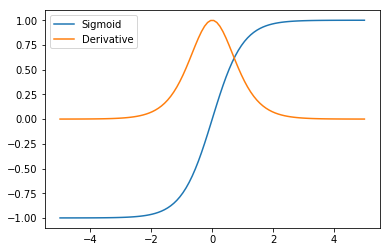

In [33]:
scale = 5
tVec = np.linspace(-scale, scale, 100)

plt.plot(tVec, [sigmoid(tVec[k]) for k in range(0, len(tVec))])
plt.plot(tVec, [sigmoidPrime(tVec[k]) for k in range(0, len(tVec))])
plt.legend(["Sigmoid", "Derivative"])

Quite nonlinear indeed. We will replace the activation function by the sigmoid:

In [34]:
def activation(self, t): return sigmoid(t)
def activationPrime(self, t): return sigmoidPrime(t)

Network.activation = activation
Network.activationPrime = activationPrime

Once again, we instantiate a network,

In [35]:
net = Network([2,3,1])

we recall the target outputs and check the current guess:

In [36]:
targetOutputs

array([[0],
       [1],
       [1],
       [0]])

In [37]:
net.outputArray(inputs)

[array([-0.74495303]),
 array([-0.8763362]),
 array([-0.76593305]),
 array([-0.8655296])]

We run the descent again, and check the result:

In [38]:
net.descent(inputs, targetOutputs)
net.outputArray(inputs)

[array([0.00534842]),
 array([0.93748822]),
 array([0.92982307]),
 array([0.00638704])]

And it works! The convergence is not fantastic yet since we are using basic gradient descent with a fixed step, but we could increase the number of iterations or use the step-varying techniques we saw last time to improve the speed of convergence.

Congratulations, you have implemented a neural network from scratch! Here is the entire code for completeness:

In [39]:
class Network:
    def __init__(self, m):
        self.m = m
        self.N = len(m)

        self.L = [np.zeros(m[a]) for a in range(0, self.N)]
        self.R = [np.zeros(m[a]) for a in range(0, self.N)]

        self.LDer = [np.zeros(m[a]) for a in range(0, self.N)]
        self.RDer = [np.zeros(m[a]) for a in range(0, self.N)]

        self.W = [rand(m[a], m[a+1])*2-1 for a in range(0, self.N-1)]
        self.B = [np.array([])] + [rand(m[a+1])*2-1 for a in range(0, self.N-1)]

        self.WGradient = [rand(m[a], m[a+1])*0 for a in range(0, self.N-1)]
        self.BGradient = [np.array([])] + [rand(m[a+1])*0 for a in range(0, self.N-1)]

    def activation(self, t): return sigmoid(t)
    def activationPrime(self, t): return sigmoidPrime(t)

    def compute(self, input):
        self.L[0] = input

        for a in range(0, self.N-1):
            self.R[a+1] = np.matmul(self.L[a], self.W[a]) + self.B[a+1]
            self.L[a+1] = np.array([self.activation(x) for x in self.R[a+1]])

        return self.L

    def output(self, input):
        return self.compute(input)[-1:][0]

    def outputArray(self, inputs):
        return [self.output(inputs[a]) for a in range(0, len(inputs))]

    def loss(self, inputs, targetOutputs):
        S = len(inputs)
        outputs = self.outputArray(inputs)

        return sum(np.power(outputs-targetOutputs,2))[0]/S

    def BDerivative(self, input, b, k):
            for a in range(0, self.N):
                self.RDer[a] = self.RDer[a]*0

                if b==a:
                    self.RDer[a][k] = 1
                elif b<a:
                    self.RDer[a] = np.matmul(self.LDer[a-1], self.W[a-1])

                self.LDer[a] = np.array([
                    self.activationPrime(self.R[a][j]) * self.RDer[a][j]
                    for j in range(self.m[a])])

    def WDerivative(self, input, b, k, l):
            for a in range(0, self.N):
                self.RDer[a] = self.RDer[a]*0

                if b==a-1:
                    self.RDer[a][l] = self.L[a-1][k]
                elif b<a-1:
                    self.RDer[a] = np.matmul(self.LDer[a-1], self.W[a-1])

                self.LDer[a] = np.array([
                    self.activationPrime(self.R[a][j]) * self.RDer[a][j]
                    for j in range(self.m[a])])

    def derivatives(self, input, targetOutput):
            output = self.output(input)

            for a in range(self.N-1):
                for k in range(self.m[a+1]):
                    self.BDerivative(input, a+1, k)
                    self.BGradient[a+1][k] += -2*(targetOutput-output)*self.LDer[-1:][0][0]

                for k in range(self.m[a]):
                    for l in range(self.m[a+1]):
                        self.WDerivative(input, a, k, l)
                        self.WGradient[a][k][l] += -2*(targetOutput-output)*self.LDer[-1:][0][0]

    def gradient(self, inputs, targetOutputs):
            S = len(inputs)

            for a in range(self.N-1):
                self.BGradient[a+1] *= 0
                self.WGradient[a] *= 0

            for k in range(S):
                self.derivatives(inputs[k], targetOutputs[k])

            for a in range(self.N-1):
                self.BGradient[a+1] /= S
                self.WGradient[a] /= S

    def descent(self, inputs, targetOutputs):
            step = 0.1

            for k in range(1000):
                self.gradient(inputs, targetOutputs)

                for a in range(self.N-1):
                    self.B[a+1] += -step * self.BGradient[a+1]
                    self.W[a] += -step * self.WGradient[a]